In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fABBA
from fABBA import fABBA

fABBA({'_alpha': 0.1, '_sorting': 'norm', '_tol': 0.1, '_scl': 1, '_verbose': 0, '_max_len': -1, '_return_list': False, '_n_jobs': 1})
BbAaAaAaAaAaAaAaC


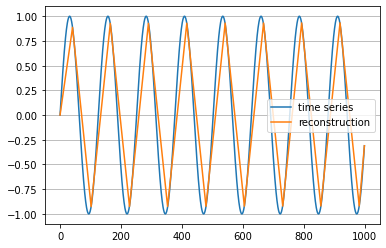

In [2]:
np.random.seed(1)
N = 100
ts = [np.sin(0.05*i) for i in range(1000)]          # original time series
fabba = fABBA(tol=0.1, alpha=0.1, sorting='norm', scl=1, verbose=0)
print(fabba)
string = fabba.fit_transform(ts)
print(string)
inverse_ts = fabba.inverse_transform(string, ts[0])
# print(inverse_ts)
plt.plot(ts, label='time series')
plt.plot(inverse_ts, label='reconstruction')
plt.legend()
plt.grid(True, axis='y')
plt.savefig('demo.png', bbox_inches='tight')
plt.show()

In [3]:
import numpy as np
from fABBA import compress
from fABBA import inverse_compress
ts = [np.sin(0.05*i) for i in range(1000)]
pieces = compress(ts, tol=0.1)               # pieces is a list of the polygonal chain pieces
inverse_ts = inverse_compress(pieces, ts[0]) # reconstruct polygonal chain from pieces

In [4]:
from fABBA import digitize
from fABBA import inverse_digitize
string, parameters = digitize(pieces, alpha=0.1, sorting='2-norm', scl=1) # compression of the polygon
print(''.join(string))                                 # prints BbAaAaAaAaAaAaAaC

inverse_pieces = inverse_digitize(string, parameters)
inverse_ts = inverse_compress(inverse_pieces, ts[0])   # numerical time series reconstruction

BbAaAaAaAaAaAaAaC


In [5]:
from sklearn.cluster import KMeans
from fABBA import ABBAbase
kmeans = KMeans(n_clusters=5, random_state=0, init='k-means++')
abba = ABBAbase(tol=0.1, scl=1, clustering=kmeans, verbose=0)
string = abba.fit_transform(ts)
print(string)

BbAaAaAaAaAaAaAaC


In [6]:
from fABBA import ABBA
abba = ABBA(tol=0.1, scl=1, k=5, verbose=0)
string = abba.fit_transform(ts)
print(string)

Compression: Reduced series of length 1000 to 17 segments. Digitization: Reduced 17 pieces to 5 symbols.
BbAaAaAaAaAaAaAaC


[[41, 0.8873623686333753, 3.6230034118116965], [61, -1.8131770509611074, 5.894396243995669], [63, 1.8484188925670724, 5.872864239427155], [63, -1.8419327359040158, 6.054176212988588], [62, 1.8542235811893586, 5.302255051945844], [63, -1.8667731343214715, 5.356342011408054], [63, 1.8606733128740292, 5.528568456372763], [63, -1.854441973348166, 5.703926225703666], [63, 1.8480795561940113, 5.882365740983746], [63, -1.8415865111266632, 6.063836552502612], [62, 1.8538910433278817, 5.311033760679765], [63, -1.86645423697901, 5.36535993691131], [63, 1.8603474578416228, 5.537753005228622], [63, -1.8541091836582453, 5.71327480118993], [63, 1.8477398553691717, 5.891875700003591], [63, -1.8412399231779957, 6.073505206331633], [17, 0.6087035275438032, 0.032630008554002186]]


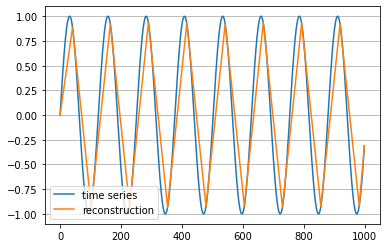

In [7]:
from fABBA import compress
from fABBA import inverse_compress

pieces = compress(ts, 0.1)
print(pieces)
inverse_ts = inverse_compress(pieces, ts[0])

plt.plot(ts, label='time series')
plt.plot(inverse_ts, label='reconstruction')
plt.legend()
plt.grid(True, axis='y')
plt.show()

In [8]:
from fABBA import digitize
from fABBA import inverse_digitize
string, parameters = digitize(pieces, alpha=0.1, sorting='2-norm', scl=1) # compression of the polygon
print(''.join(string))                                 # prints BbAaAaAaAaAaAaAaC

inverse_pieces = inverse_digitize(string, parameters)
inverse_ts = inverse_compress(inverse_pieces, ts[0])   # numerical time series

BbAaAaAaAaAaAaAaC


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from fABBA.load_datasets import load_images
from fABBA import image_compress
from fABBA import image_decompress
from cv2 import resize

img_samples = load_images() # load fABBA image test samples
img = resize(img_samples[0], (100, 100)) # select the first image for test
fabba = fABBA(tol=0.1, alpha=0.01, sorting='2-norm', scl=1, verbose=1, max_len=-1)
strings = image_compress(fabba, img)
inverse_img = image_decompress(fabba, strings)

2022-11-16 18:29:26,717;INFO;Digitization: Reduced pieces of length 15534 to 975  symbols


In [10]:
IMG = plt.imread('samples/img/n02101556_4241.jpg')

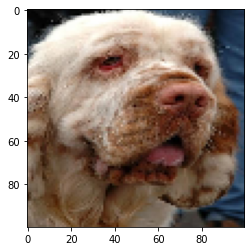

In [11]:
plt.imshow(img)
plt.savefig('img.png', bbox_inches='tight')
plt.show()

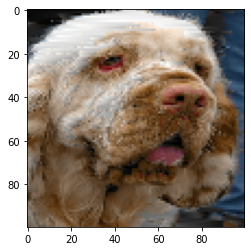

In [12]:
plt.imshow(inverse_img)
plt.savefig('inverse_img.png', bbox_inches='tight')
plt.show()